In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set_style(rc=plt.rcParams)

In [2]:
from src.parameters import ANIMALS
from loren_frank_data_processing import make_epochs_dataframe
from loren_frank_data_processing import make_neuron_dataframe
from loren_frank_data_processing import get_position_dataframe

In [3]:
epoch_info = make_epochs_dataframe(ANIMALS)

In [4]:
neuron_info = make_neuron_dataframe(ANIMALS)

In [ ]:
neuron_info

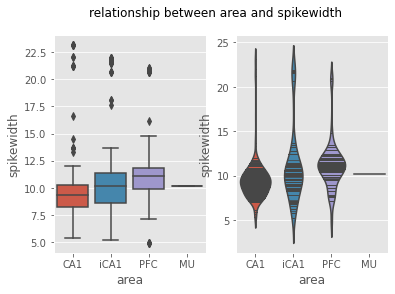

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2)
sns.boxplot(x='area', y='spikewidth',
            data=neuron_info,
            ax=ax[0])
sns.violinplot(x='area', y='spikewidth',
               inner='stick',
               data=neuron_info,
               ax=ax[1])
fig.suptitle('relationship between area and spikewidth')
fig.savefig('../figures/area_versus_spikewidth.png')

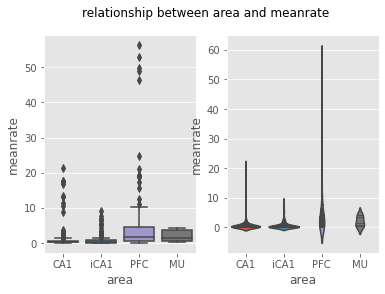

In [6]:
column = 'meanrate'

fig, ax = plt.subplots(nrows=1, ncols=2)
sns.boxplot(x='area', y=column,
            data=neuron_info,
            ax=ax[0])
sns.violinplot(x='area', y=column,
               inner='stick',
               data=neuron_info,
               ax=ax[1])
fig.suptitle(f'relationship between area and {column}')
fig.savefig(f'../figures/area_versus_{column}.png')

In [7]:
epoch_key = ('HPa', 3, 2) # animal, day, epoch

In [8]:
position_info = get_position_dataframe(epoch_key, ANIMALS)

Failed to load file: /home/trevortknguyen/repos/tn_decoding/src/../Raw-Data/HPa_direct/HPaDIO03.mat
No DIO file found, using distance from well to segment trials
Failed to load file: /home/trevortknguyen/repos/tn_decoding/src/../Raw-Data/HPa_direct/HPaDIO03.mat
No DIO file found, inferring correct inbound/outbound from task rules


In [9]:
position_info

,x_position,y_position,head_direction,speed,linear_distance,projected_x_position,projected_y_position,track_segment_id,arm_name,labeled_segments,from_well,to_well,task,is_correct,turn,linear_position,linear_velocity,linear_speed
time,,,,,,,,,,,,,,,,,,
0 days 00:44:27.394800,99.016856,60.484488,NaN,13.201583,38.311049,98.071994,60.467253,0.0,Center Arm,1,NaN,NaN,NaN,False,NaN,38.311049,0.794794,0.794794
0 days 00:44:27.428100,98.331665,59.897514,NaN,13.201583,38.885429,98.082470,59.892968,0.0,Center Arm,1,NaN,NaN,NaN,False,NaN,38.885429,0.794794,0.794794
0 days 00:44:27.461500,97.668233,59.378460,NaN,13.216356,39.392298,98.091714,59.386184,0.0,Center Arm,1,NaN,NaN,NaN,False,NaN,39.392298,1.589229,1.589229
0 days 00:44:27.494800,97.260545,58.823229,NaN,13.246184,39.940000,98.101703,58.838573,0.0,Center Arm,1,NaN,NaN,NaN,False,NaN,39.940000,2.382901,2.382901
0 days 00:44:27.528200,97.007111,58.252922,-1.383185,13.291614,40.505590,98.112018,58.273077,0.0,Center Arm,1,NaN,NaN,NaN,False,NaN,40.505590,3.175396,3.175396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 01:05:41.852800,103.350000,99.436466,NaN,0.103949,0.000000,97.373272,98.771930,0.0,Center Arm,138,NaN,NaN,NaN,False,NaN,0.000000,0.000000,0.000000
0 days 01:05:41.886100,103.350000,99.485082,NaN,0.107592,0.000000,97.373272,98.771930,0.0,Center Arm,138,NaN,NaN,NaN,False,NaN,0.000000,0.000000,0.000000
0 days 01:05:41.919500,103.350000,99.538789,0.352990,0.110385,0.000000,97.373272,98.771930,0.0,Center Arm,138,NaN,NaN,NaN,False,NaN,0.000000,0.000000,0.000000


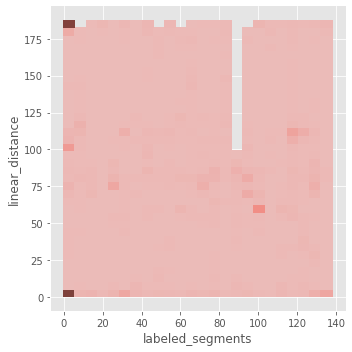

In [10]:
sns.displot(x='labeled_segments', y='linear_distance',
            data=position_info)


<AxesSubplot:xlabel='time', ylabel='labeled_segments'>

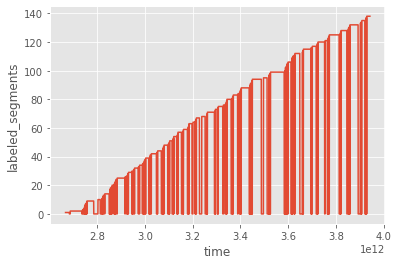

In [16]:
sns.lineplot(x='time', y='labeled_segments',
            data=position_info)

Text(0.5, 0.98, 'scatterplot subsampled every 200 points ([::200])')

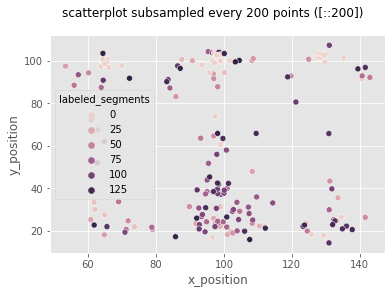

In [23]:
fig, ax = plt.subplots()
sns.scatterplot(x='x_position', y='y_position', hue='labeled_segments',
            data=position_info[::200],
               ax=ax)
fig.suptitle('scatterplot subsampled every 200 points ([::200])')

Text(0.5, 0.98, 'scatterplot when labeled_segments == 0')

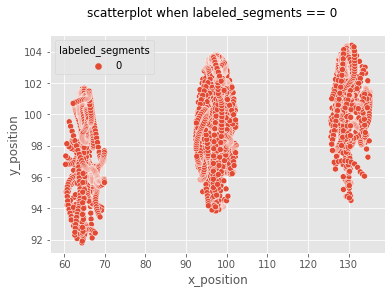

In [25]:
fig, ax = plt.subplots()
sns.scatterplot(x='x_position', y='y_position', hue='labeled_segments',
            data=position_info[position_info['labeled_segments'] == 0],
               ax=ax)
fig.suptitle('scatterplot when labeled_segments == 0')

Text(0.5, 0.98, 'scatterplot when labeled_segments != 0')

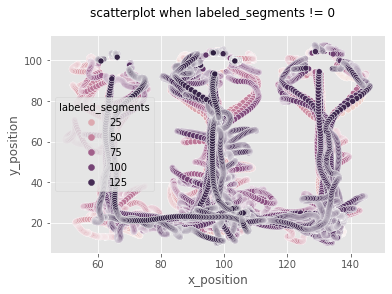

In [28]:
fig, ax = plt.subplots()
sns.scatterplot(x='x_position', y='y_position', hue='labeled_segments',
            data=position_info[position_info['labeled_segments'] != 0],
               ax=ax)
fig.suptitle('scatterplot when labeled_segments != 0')

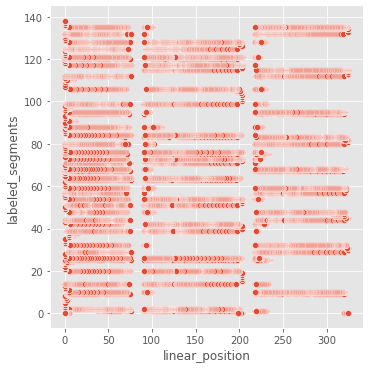

In [27]:
sns.relplot(x='linear_position', y='labeled_segments',
            data=position_info)

Text(0.5, 0.98, 'scatterplot of linear position subsampled [::200]')

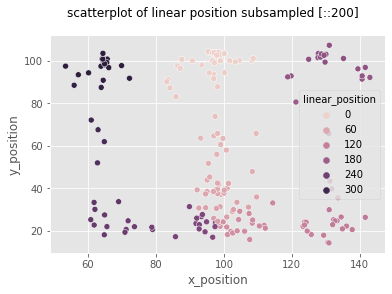

In [29]:
fig, ax = plt.subplots()
sns.scatterplot(x='x_position', y='y_position', hue='linear_position',
            data=position_info[::200],
               ax=ax)
fig.suptitle('scatterplot of linear position subsampled [::200]')

<AxesSubplot:xlabel='time', ylabel='linear_position'>

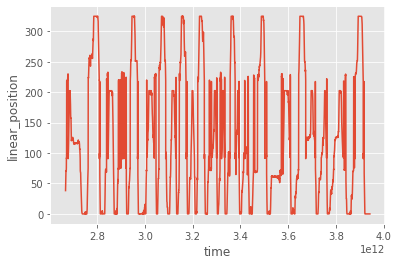

In [30]:
sns.lineplot(x='time', y='linear_position',
            data=position_info)

<AxesSubplot:xlabel='time', ylabel='linear_distance'>

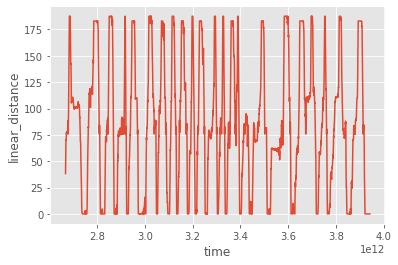

In [31]:
sns.lineplot(x='time', y='linear_distance',
            data=position_info)

<AxesSubplot:xlabel='linear_position', ylabel='linear_distance'>

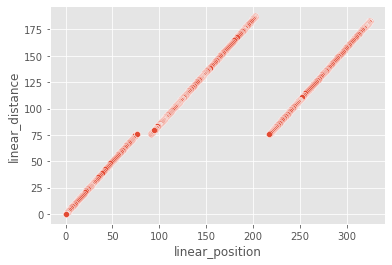

In [35]:
sns.scatterplot(x='linear_position', y='linear_distance',
            data=position_info)


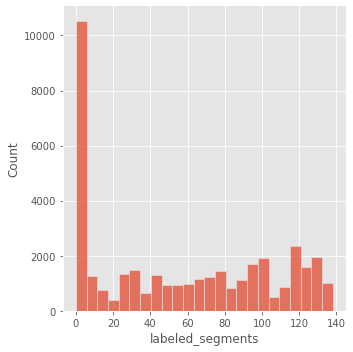

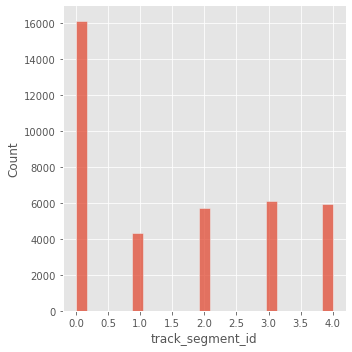

In [36]:
sns.displot(x='labeled_segments',
           data=position_info)
sns.displot(x='track_segment_id',
           data=position_info)

<AxesSubplot:xlabel='linear_position', ylabel='track_segment_id'>

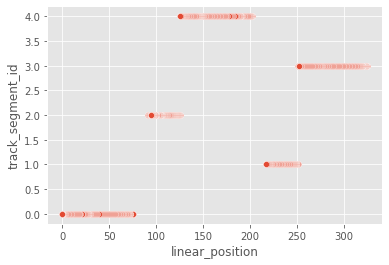

In [37]:
sns.scatterplot(x='linear_position', y='track_segment_id',
            data=position_info)

<AxesSubplot:xlabel='x_position', ylabel='y_position'>

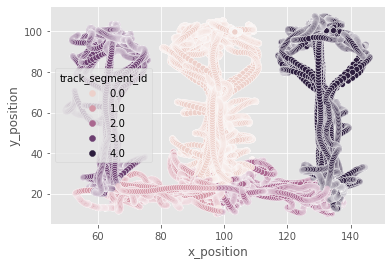

In [38]:
sns.scatterplot(x='x_position', y='y_position', hue='track_segment_id',
            data=position_info)